[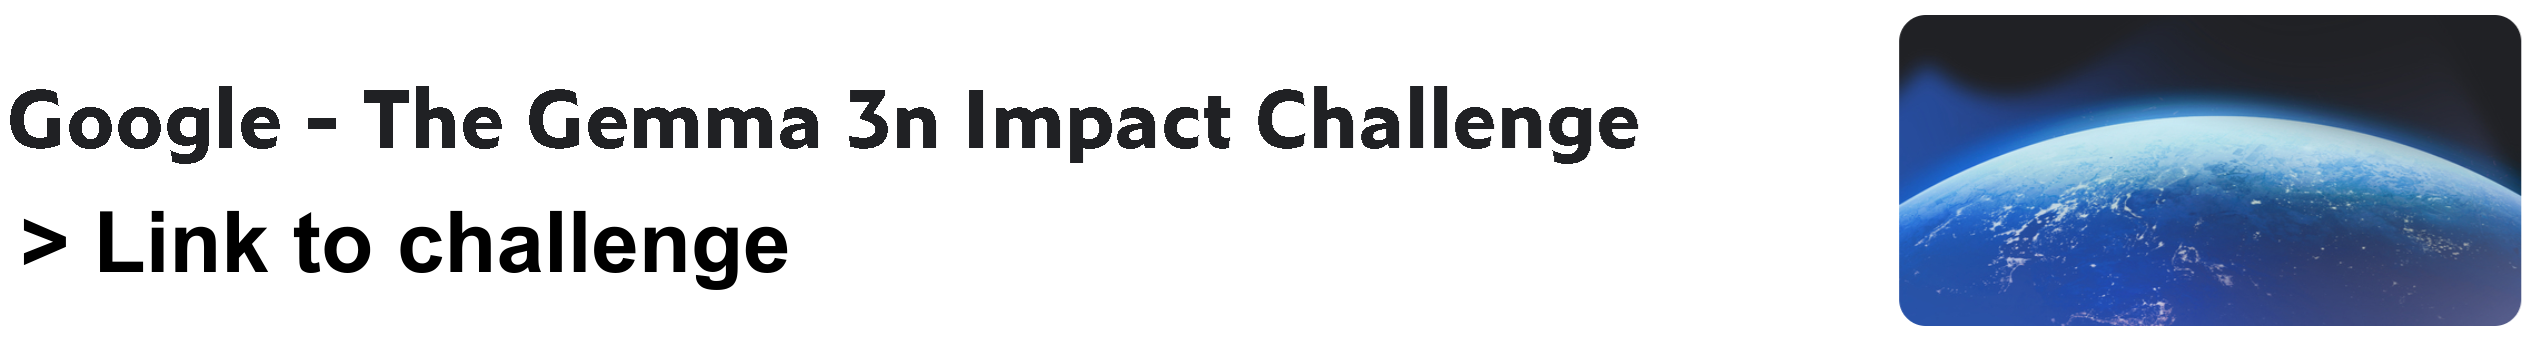](https://www.kaggle.com/competitions/google-gemma-3n-hackathon/overview)

To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Kaggle instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)

Read our **[Gemma 3N Guide](https://docs.unsloth.ai/basics/gemma-3n-how-to-run-and-fine-tune)** and check out our new **[Dynamic 2.0](https://docs.unsloth.ai/basics/unsloth-dynamic-2.0-ggufs)** quants which outperforms other quantization methods!

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).

### Installation

In [1]:
import os
os.environ["UNSLOTH_COMPILE_DISABLE"] = "1"
os.environ["UNSLOTH_DISABLE_FAST_GENERATION"] = "1"

### Unsloth

`FastModel` supports loading nearly any model now! This includes Vision, Text and Audio models!

In [ ]:
%pip install --upgrade jupyter ipywidgets
%jupyter nbextension enable --py widgetsnbextension


In [1]:
from unsloth import FastModel
import torch

fourbit_models = [
    # 4bit dynamic quants for superior accuracy and low memory use
    "unsloth/gemma-3n-E4B-it-unsloth-bnb-4bit",
    "unsloth/gemma-3n-E2B-it-unsloth-bnb-4bit",
    # Pretrained models
    "unsloth/gemma-3n-E4B-unsloth-bnb-4bit",
    "unsloth/gemma-3n-E2B-unsloth-bnb-4bit",

    # Other Gemma 3 quants
    "unsloth/gemma-3-1b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-12b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-27b-it-unsloth-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastModel.from_pretrained(
    model_name = "unsloth/gemma-3n-E4B-it", # Or "unsloth/gemma-3n-E2B-it"
    dtype = None, # None for auto detection
    max_seq_length = 1024, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
    # token = "hf_...", # use one if using gated models
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.7.3: Fast Gemma3N patching. Transformers: 4.53.0.
   \\   /|    NVIDIA H100 80GB HBM3. Num GPUs = 4. Max memory: 79.179 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.1+cu126. CUDA: 9.0. CUDA Toolkit: 12.6. Triton: 3.3.1
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.31.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Gemma3N does not support SDPA - switching to eager!


Loading checkpoint shards: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


# Gemma 3N can process Text, Vision and Audio!

Let's first experience how Gemma 3N can handle multimodal inputs. We use Gemma 3N's recommended settings of `temperature = 1.0, top_p = 0.95, top_k = 64`

In [2]:
from transformers import TextStreamer
import gc

In [3]:
from transformers import TextStreamer
import gc
# Helper function for inference
def do_gemma_3n_inference(model, messages, max_new_tokens = 128):
    inputs = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt = True, # Must add for generation
        tokenize = True,
        return_dict = True,
        return_tensors = "pt",
    ).to("cuda")
    _ = model.generate(
        **inputs,
        max_new_tokens = max_new_tokens,
        temperature = 1.0, top_p = 0.95, top_k = 64,
        streamer = TextStreamer(tokenizer, skip_prompt = True),
    )
    # Cleanup to reduce VRAM usage
    del inputs
    torch.cuda.empty_cache()
    gc.collect()

# Gemma 3N can see images!

<img src="https://files.worldwildlife.org/wwfcmsprod/images/Sloth_Sitting_iStock_3_12_2014/story_full_width/8l7pbjmj29_iStock_000011145477Large_mini__1_.jpg" alt="Alt text" height="256">

In [4]:
sloth_link = "https://files.worldwildlife.org/wwfcmsprod/images/Sloth_Sitting_iStock_3_12_2014/story_full_width/8l7pbjmj29_iStock_000011145477Large_mini__1_.jpg"

messages = [{
    "role" : "user",
    "content": [
        { "type": "image", "image" : sloth_link },
        { "type": "text",  "text" : "Which films does this animal feature in?" }
    ]
}]
# You might have to wait 1 minute for Unsloth's auto compiler
do_gemma_3n_inference(model, messages, max_new_tokens = 256)

unknown:0: unknown: block: [113,0,0], thread: [416,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [417,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [418,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [419,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [420,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [421,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [422,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [423,0,0] Assertion `index out of bounds: 0 <= tmp6 < 128` failed.
unknown:0: unknown: block: [113,0,0], thread: [424,0,0] Assertion `index out of bounds: 0 <= tmp

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [5]:
sloth_link = "https://files.worldwildlife.org/wwfcmsprod/images/Sloth_Sitting_iStock_3_12_2014/story_full_width/8l7pbjmj29_iStock_000011145477Large_mini__1_.jpg"

messages = [{
    "role" : "user",
    "content": [
        { "type": "image", "image" : sloth_link },
        { "type": "text",  "text" : "Que filmes tem o animal da imagem?" }
    ]
}]
# You might have to wait 1 minute for Unsloth's auto compiler
do_gemma_3n_inference(model, messages, max_new_tokens = 256)

O animal na imagem é um **preguiça**. Existem alguns filmes e desenhos animados que apresentam preguiças, embora nem sempre sejam o foco principal. Alguns exemplos incluem:

* **Zootopia (2016):** O personagem Flash é uma preguiça e faz parte do elenco. Ele é conhecido por sua lentidão e personalidade calma.
* **Mogli, o Menino Lobo (2016):** Há uma cena com preguiças na floresta.
* **Diversos desenhos animados e animações infantis:** Preguiças aparecem com frequência em histórias infantis por sua natureza lenta e divertida.

Se você tiver interesse em filmes ou desenhos animados específicos com preguiças, posso tentar te dar mais informações!<end_of_turn>


In [ ]:
transformers: 4.54.0.dev0
torch: 2.7.1+cu126
timm: 1.0.17
unsloth: 2025.7.3
unsloth_zoo: 2025.7.4

Let's make a poem about sloths!

In [5]:
messages = [{
    "role": "user",
    "content": [{ "type" : "text",
                  "text" : "Write a poem about sloths." }]
}]
do_gemma_3n_inference(model, messages, max_new_tokens = 128)

In emerald canopy, a gentle sway,
The sloth hangs dreaming, at the close of day.
A furry smile, a peaceful, slow embrace,
Lost in the rhythm of a tranquil space.

He moves with purpose, but a glacial pace,
A master of stillness, in this leafy place.
He munches leaves, a verdant, slow delight,
Ignoring hurry, bathed in dappled light.

No need for rushing, no need to strive,
Just quiet moments, where the dreams survive.
A camouflage expert, in shades of green,
A living artwork, seldom to be seen.




# Gemma 3N can also hear!

In [6]:
from IPython.display import Audio, display
Audio("https://www.nasa.gov/wp-content/uploads/2015/01/591240main_JFKmoonspeech.mp3")

In [5]:
from IPython.display import Audio, display

In [ ]:
!wget -qqq https://www.nasa.gov/wp-content/uploads/2015/01/591240main_JFKmoonspeech.mp3 -O audio.mp3

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [6]:
from transformers import TextStreamer
import gc
# Helper function for inference
def do_gemma_3n_inference(model, messages, max_new_tokens = 128):
    inputs = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt = True, # Must add for generation
        tokenize = True,
        return_dict = True,
        return_tensors = "pt",
    ).to("cuda")
    
    # Convert input tensors to match model dtype
    if hasattr(model, 'dtype') and model.dtype == torch.bfloat16:
        for key in inputs:
            if isinstance(inputs[key], torch.Tensor) and inputs[key].dtype == torch.float32:
                inputs[key] = inputs[key].to(torch.bfloat16)
    
    _ = model.generate(
        **inputs,
        max_new_tokens = max_new_tokens,
        temperature = 1.0, top_p = 0.95, top_k = 64,
        streamer = TextStreamer(tokenizer, skip_prompt = True),
    )
    # Cleanup to reduce VRAM usage
    del inputs
    torch.cuda.empty_cache()
    gc.collect()

In [6]:
audio_file = "audio.mp3"

messages = [{
    "role" : "user",
    "content": [
        { "type": "audio", "audio" : audio_file },
        { "type": "text",  "text" : "What is this audio about?" }
    ]
}]
do_gemma_3n_inference(model, messages, max_new_tokens = 256)

The audio is a speech by President John F. Kennedy, delivered on May 25, 1961, at Rice University in Houston, Texas. In this speech, he passionately declares the nation's commitment to achieving the goal of landing a man on the Moon and returning him safely to Earth before the end of the decade. It's a famous and inspiring moment in American history, outlining a bold and ambitious space exploration goal.<end_of_turn>


# Let's combine all 3 modalities together!

In [10]:
messages = [{
    "role" : "user",
    "content": [
        { "type": "audio", "audio" : audio_file },
        { "type": "image", "image" : sloth_link },
        { "type": "text",  "text" : "What is this audio and image about? "\
                                    "How are they related?" }
    ]
}]
do_gemma_3n_inference(model, messages, max_new_tokens = 256)

The audio is a quote from President John F. Kennedy's 1961 speech to Congress, where he declared the national goal of landing a man on the moon and returning him safely to Earth before the end of the decade. 

The image is of a sloth, known for its slow movement and relaxed nature. 

The relationship between the audio and image is ironic. Kennedy's ambitious goal of reaching the moon represented a rapid advancement in technology and exploration, while the sloth embodies slowness and a different pace of life. The juxtaposition highlights the contrast between human ambition and the natural world's more leisurely rhythm. 

It's likely the image is used to create a humorous or thought-provoking connection, perhaps suggesting that the goal of reaching the moon was a monumental task, contrasting with the slow and steady pace of a sloth.<end_of_turn>


# Let's finetune Gemma 3N!

You can finetune the vision and text parts for now through selection - the audio part can also be finetuned - we're working to make it selectable as well!

In [2]:
from unsloth import FastModel
import torch

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/usr/local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!


We now add LoRA adapters so we only need to update a small amount of parameters!

In [6]:
model = FastModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # Turn off for just text!
    finetune_language_layers   = True,  # Should leave on!
    finetune_attention_modules = True,  # Attention good for GRPO
    finetune_mlp_modules       = True,  # Should leave on always!

    r = 8,           # Larger = higher accuracy, but might overfit
    lora_alpha = 8,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
)

Unsloth: Making `model.base_model.model.model.language_model` require gradients


<a name="Data"></a>
### Data Prep
We now use the `Gemma-3` format for conversation style finetunes. We use [Maxime Labonne's FineTome-100k](https://huggingface.co/datasets/mlabonne/FineTome-100k) dataset in ShareGPT style. Gemma-3 renders multi turn conversations like below:

```
<bos><start_of_turn>user
Hello!<end_of_turn>
<start_of_turn>model
Hey there!<end_of_turn>
```

We use our `get_chat_template` function to get the correct chat template. We support `zephyr, chatml, mistral, llama, alpaca, vicuna, vicuna_old, phi3, llama3, phi4, qwen2.5, gemma3` and more.

In [7]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "gemma-3",
)

We get the first 3000 rows of the dataset

In [8]:
from datasets import load_dataset
dataset = load_dataset("mlabonne/FineTome-100k", split = "train[:3000]")

In [9]:
dataset[100]

{'conversations': [{'from': 'human',
   'value': 'What is the modulus operator in programming and how can I use it to calculate the modulus of two given numbers?'},
  {'from': 'gpt',
   'value': 'In programming, the modulus operator is represented by the \'%\' symbol. It calculates the remainder when one number is divided by another. To calculate the modulus of two given numbers, you can use the modulus operator in the following way:\n\n```python\n# Calculate the modulus\nModulus = a % b\n\nprint("Modulus of the given numbers is: ", Modulus)\n```\n\nIn this code snippet, the variables \'a\' and \'b\' represent the two given numbers for which you want to calculate the modulus. By using the modulus operator \'%\', we calculate the remainder when \'a\' is divided by \'b\'. The result is then stored in the variable \'Modulus\'. Finally, the modulus value is printed using the \'print\' statement.\n\nFor example, if \'a\' is 10 and \'b\' is 4, the modulus calculation would be 10 % 4, which e

We now use `standardize_data_formats` to try converting datasets to the correct format for finetuning purposes!

In [10]:
from unsloth.chat_templates import standardize_data_formats
dataset = standardize_data_formats(dataset)

Let's see how row 100 looks like!

In [11]:
dataset[100]

{'conversations': [{'content': 'What is the modulus operator in programming and how can I use it to calculate the modulus of two given numbers?',
   'role': 'user'},
  {'content': 'In programming, the modulus operator is represented by the \'%\' symbol. It calculates the remainder when one number is divided by another. To calculate the modulus of two given numbers, you can use the modulus operator in the following way:\n\n```python\n# Calculate the modulus\nModulus = a % b\n\nprint("Modulus of the given numbers is: ", Modulus)\n```\n\nIn this code snippet, the variables \'a\' and \'b\' represent the two given numbers for which you want to calculate the modulus. By using the modulus operator \'%\', we calculate the remainder when \'a\' is divided by \'b\'. The result is then stored in the variable \'Modulus\'. Finally, the modulus value is printed using the \'print\' statement.\n\nFor example, if \'a\' is 10 and \'b\' is 4, the modulus calculation would be 10 % 4, which equals 2. Theref

We now have to apply the chat template for `Gemma-3` onto the conversations, and save it to `text`. We remove the `<bos>` token using removeprefix(`'<bos>'`) since we're finetuning. The Processor will add this token before training and the model expects only one.

In [12]:
def formatting_prompts_func(examples):
   convos = examples["conversations"]
   texts = [tokenizer.apply_chat_template(convo, tokenize = False, add_generation_prompt = False).removeprefix('<bos>') for convo in convos]
   return { "text" : texts, }

dataset = dataset.map(formatting_prompts_func, batched = True)

Let's see how the chat template did! Notice there is no `<bos>` token as the processor tokenizer will be adding one.

In [13]:
dataset[100]["text"]

'<start_of_turn>user\nWhat is the modulus operator in programming and how can I use it to calculate the modulus of two given numbers?<end_of_turn>\n<start_of_turn>model\nIn programming, the modulus operator is represented by the \'%\' symbol. It calculates the remainder when one number is divided by another. To calculate the modulus of two given numbers, you can use the modulus operator in the following way:\n\n```python\n# Calculate the modulus\nModulus = a % b\n\nprint("Modulus of the given numbers is: ", Modulus)\n```\n\nIn this code snippet, the variables \'a\' and \'b\' represent the two given numbers for which you want to calculate the modulus. By using the modulus operator \'%\', we calculate the remainder when \'a\' is divided by \'b\'. The result is then stored in the variable \'Modulus\'. Finally, the modulus value is printed using the \'print\' statement.\n\nFor example, if \'a\' is 10 and \'b\' is 4, the modulus calculation would be 10 % 4, which equals 2. Therefore, the ou

<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`.

In [14]:
from trl import SFTTrainer, SFTConfig
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    eval_dataset = None, # Can set up evaluation!
    args = SFTConfig(
        dataset_text_field = "text",
        per_device_train_batch_size = 8,
        #gradient_accumulation_steps = 4, # Use GA to mimic batch size!
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4, # Reduce to 2e-5 for long training runs
        logging_steps = 1,
        optim = "paged_adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "none", # Use this for WandB etc
    ),
)

We also use Unsloth's `train_on_completions` method to only train on the assistant outputs and ignore the loss on the user's inputs. This helps increase accuracy of finetunes!

In [15]:
from unsloth.chat_templates import train_on_responses_only
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<start_of_turn>user\n",
    response_part = "<start_of_turn>model\n",
)

Let's verify masking the instruction part is done! Let's print the 100th row again.  Notice how the sample only has a single `<bos>` as expected!

In [16]:
tokenizer.decode(trainer.train_dataset[100]["input_ids"])

'<bos><start_of_turn>user\nWhat is the modulus operator in programming and how can I use it to calculate the modulus of two given numbers?<end_of_turn>\n<start_of_turn>model\nIn programming, the modulus operator is represented by the \'%\' symbol. It calculates the remainder when one number is divided by another. To calculate the modulus of two given numbers, you can use the modulus operator in the following way:\n\n```python\n# Calculate the modulus\nModulus = a % b\n\nprint("Modulus of the given numbers is: ", Modulus)\n```\n\nIn this code snippet, the variables \'a\' and \'b\' represent the two given numbers for which you want to calculate the modulus. By using the modulus operator \'%\', we calculate the remainder when \'a\' is divided by \'b\'. The result is then stored in the variable \'Modulus\'. Finally, the modulus value is printed using the \'print\' statement.\n\nFor example, if \'a\' is 10 and \'b\' is 4, the modulus calculation would be 10 % 4, which equals 2. Therefore, t

Now let's print the masked out example - you should see only the answer is present:

In [17]:
tokenizer.decode([tokenizer.pad_token_id if x == -100 else x for x in trainer.train_dataset[100]["labels"]]).replace(tokenizer.pad_token, " ")

'                               In programming, the modulus operator is represented by the \'%\' symbol. It calculates the remainder when one number is divided by another. To calculate the modulus of two given numbers, you can use the modulus operator in the following way:\n\n```python\n# Calculate the modulus\nModulus = a % b\n\nprint("Modulus of the given numbers is: ", Modulus)\n```\n\nIn this code snippet, the variables \'a\' and \'b\' represent the two given numbers for which you want to calculate the modulus. By using the modulus operator \'%\', we calculate the remainder when \'a\' is divided by \'b\'. The result is then stored in the variable \'Modulus\'. Finally, the modulus value is printed using the \'print\' statement.\n\nFor example, if \'a\' is 10 and \'b\' is 4, the modulus calculation would be 10 % 4, which equals 2. Therefore, the output of the above code would be:\n\n```\nModulus of the given numbers is: 2\n```\n\nThis means that the modulus of 10 and 4 is 2.<end_of_t

In [18]:
# @title Show current memory stats
import gc
gc.collect()
torch.cuda.empty_cache()
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA H100 80GB HBM3. Max memory = 79.179 GB.
9.486 GB of memory reserved.


# Let's train the model!

To resume a training run, set `trainer.train(resume_from_checkpoint = True)`

In [19]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 3,000 | Num Epochs = 2 | Total steps = 60
O^O/ \_/ \    Batch size per device = 32 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (32 x 2 x 1) = 64
 "-____-"     Trainable parameters = 19,210,240 of 7,869,188,432 (0.24% trained)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


OutOfMemoryError: CUDA out of memory. Tried to allocate 16.50 GiB. GPU 0 has a total capacity of 79.18 GiB of which 9.95 GiB is free. Including non-PyTorch memory, this process has 69.22 GiB memory in use. Of the allocated memory 68.23 GiB is allocated by PyTorch, and 263.20 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [21]:
# @title Show final memory and time stats
gc.collect()
torch.cuda.empty_cache()
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

444.6619 seconds used for training.
7.41 minutes used for training.
Peak reserved memory = 27.82 GB.
Peak reserved memory for training = 18.515 GB.
Peak reserved memory % of max memory = 35.136 %.
Peak reserved memory for training % of max memory = 23.384 %.


<a name="Inference"></a>
### Inference
Let's run the model via Unsloth native inference! According to the `Gemma-3` team, the recommended settings for inference are `temperature = 1.0, top_p = 0.95, top_k = 64`

In [ ]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "gemma-3",
)
messages = [{
    "role": "user",
    "content": [{
        "type" : "text",
        "text" : "Continue the sequence: 1, 1, 2, 3, 5, 8,",
    }]
}]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
    tokenize = True,
    return_dict = True,
).to("cuda")
outputs = model.generate(
    **inputs,
    max_new_tokens = 64, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
)


In [36]:
print(tokenizer.batch_decode(outputs)[0])

<bos><start_of_turn>user
Continue the sequence: 1, 1, 2, 3, 5, 8,<end_of_turn>
<start_of_turn>model
1715648717178717546171711758771774717175671717117171997171799000


In [28]:
tokenizer.batch_decode(outputs)

['<bos><start_of_turn>user\nContinue the sequence: 1, 1, 2, 3, 5, 8,<end_of_turn>\n<start_of_turn>model\nTheR<end_of_turn>']

 You can also use a `TextStreamer` for continuous inference - so you can see the generation token by token, instead of waiting the whole time!

In [ ]:
messages = [{
    "role": "user",
    "content": [{"type" : "text", "text" : "Why is the sky blue?",}]
}]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
    tokenize = True,
    return_dict = True,
).to("cuda")

from transformers import TextStreamer
_ = model.generate(
    **inputs,
    max_new_tokens = 64, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
    streamer = TextStreamer(tokenizer, skip_prompt = True),
    
)

<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [24]:
model.save_pretrained("gemma-3n")  # Local saving
tokenizer.save_pretrained("gemma-3n")
# model.push_to_hub("HF_ACCOUNT/gemma-3", token = "...") # Online saving
# tokenizer.push_to_hub("HF_ACCOUNT/gemma-3", token = "...") # Online saving

['gemma-3n/processor_config.json']

Now if you want to load the LoRA adapters we just saved for inference, set `False` to `True`:

In [ ]:
if False:
    from unsloth import FastModel
    model, tokenizer = FastModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = 2048,
        load_in_4bit = True,
    )

messages = [{
    "role": "user",
    "content": [{"type" : "text", "text" : "What is Gemma-3N?",}]
}]
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
    return_tensors = "pt",
    tokenize = True,
    return_dict = True,
).to("cuda")

from transformers import TextStreamer
_ = model.generate(
    **inputs,
    max_new_tokens = 256, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
    streamer = TextStreamer(tokenizer, skip_prompt = True),
)

### Saving to float16 for VLLM

We also support saving to `float16` directly for deployment! We save it in the folder `gemma-3N-finetune`. Set `if False` to `if True` to let it run!

In [26]:
if False: # Change to True to save finetune!
    model.save_pretrained_merged("gemma-3N-finetune", tokenizer)

If you want to upload / push to your Hugging Face account, set `if False` to `if True` and add your Hugging Face token and upload location!

In [27]:
if False: # Change to True to upload finetune
    model.push_to_hub_merged(
        "HF_ACCOUNT/gemma-3N-finetune", tokenizer,
        token = "hf_..."
    )

### GGUF / llama.cpp Conversion
To save to `GGUF` / `llama.cpp`, we support it natively now for all models! For now, you can convert easily to `Q8_0, F16 or BF16` precision. `Q4_K_M` for 4bit will come later!

In [31]:
if False: # Change to True to save to GGUF
    model.save_pretrained_gguf(
        "gemma-3N-finetune",
        quantization_type = "Q8_0", # For now only Q8_0, BF16, F16 supported
    )

Likewise, if you want to instead push to GGUF to your Hugging Face account, set `if False` to `if True` and add your Hugging Face token and upload location!

In [32]:
if False: # Change to True to upload GGUF
    model.push_to_hub_gguf(
        "gemma-3N-finetune",
        quantization_type = "Q8_0", # Only Q8_0, BF16, F16 supported
        repo_id = "HF_ACCOUNT/gemma-3N-finetune-gguf",
        token = "hf_...",
    )

Now, use the `gemma-3N-finetune.gguf` file or `gemma-3N-finetune-Q4_K_M.gguf` file in llama.cpp or a UI based system like Jan or Open WebUI. You can install Jan [here](https://github.com/janhq/jan) and Open WebUI [here](https://github.com/open-webui/open-webui)

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️
</div>
